## Analysing multilingual newspapers: The French Revolution (part 2)

Institutions around the world have digitised and made openly available newspapers including different languages and countries. Newspapers enables researchers to deepen the understanding of transnational culture using interdisciplinary digital methods. In this sense, the Revolution in France in Europe led to the creation of the French Second Republic.

This notebook uses historic newspapers and select digitized newspaper pages provided by [Chronicling America](https://chroniclingamerica.loc.gov/about/) and [Europeana Newspapers](https://pro.europeana.eu/page/iiif).

[Chronicling America](https://chroniclingamerica.loc.gov/about/api/) provides an extensive application programming interface (API) which you can use to explore all of the data. The information is also published as, including the OCR text files. Europeana Newspapers is based on IIIF to search and access information about the digital objects.

*Note:* This notebook requires the use of the pre-trained BERT model consisting on a large size file and should be runned locally.

### Setting things up

In [2]:
import pandas as pd
import os
from pathlib import Path
import requests
import matplotlib.pyplot as plt
import json

### Let's retrieve the results!

In the previous notebook we have created a transnational dataset using the newspapers provided by Chronicling America and Europeana Newspapers.

Let's use the dataset for Named Entity Recognition using a mulltilingual pre-trained BERT model.

In [3]:
df = pd.read_csv('out-french-revolution.zip')

In [4]:
df.head(5)

,edition,frequency,location,subject,date,publisher,language,identifier,provider,title,place_of_publication,text,id
0,NaN,Daily (except Sunday),"['Alexandria', 'Alexandria', 'Alexandria']","['Alexandria (Va.)--Newspapers.', 'Alexandria ...",18480411,Edgar Snowden,['English'],sn85025007,Library of Congress,Alexandria gazette. [volume],"Alexandria, D.C.","P l « I. lS II K 1) 1> A I I. V A X l> l K I*""...",NaN
1,NaN,Daily (except Sun.),['New Orleans'],['Louisiana--New Orleans.--fast--(OCoLC)fst012...,18480325,Hayes & M'Clure,['English'],sn82015378,Library of Congress,The daily crescent. [volume],"[New Orleans, La.]",DAILY CRESCENT.\nPUBLISHED every DAY — sundays...,NaN
2,NaN,Weekly,['Dubuque'],"['Dubuque (Iowa)--Newspapers.', 'Dubuque Count...",18480126,George Greene,['English'],sn86083352,Library of Congress,Weekly miners' express.,"DuBuque, Iowa",t'eiiis of the Mines' Express\nTwo\ndollars pe...,NaN
3,NaN,Daily,['New York'],"['New York (N.Y.)--Newspapers.', 'New York (St...",18480504,James Gordon Bennett,['English'],sn83030313,Library of Congress,The New York herald. [volume],New York [N.Y.],hc.w YORK HERALD.\nHartk-WMl Onrnar *r vmiimi ...,NaN
4,NaN,Daily,['New York'],"['New York (N.Y.)--Newspapers.', 'New York (St...",18480512,James Gordon Bennett,['English'],sn83030313,Library of Congress,The New York herald. [volume],New York [N.Y.],?iod let hm a.-k? I>ias b? that ln.lul^>'? in ...,NaN


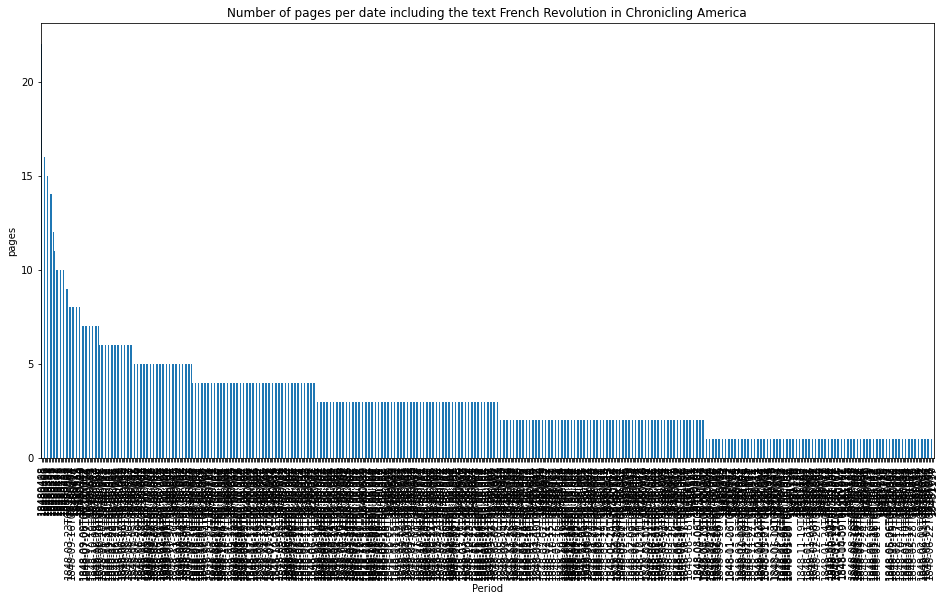

In [5]:
ax = df['date'].value_counts().plot(kind='bar',
                                    figsize=(16,8),
                                    title="Number of pages per date including the text French Revolution in Chronicling America")
ax.set_xlabel("Period")
ax.set_ylabel("pages")
plt.show()

## We can see that dates are not normalized

In [6]:
df.groupby("date")["title"].count()

date
1848-01-01T00:00:00Z    2
1848-01-02T00:00:00Z    1
1848-01-03T00:00:00Z    1
1848-01-05T00:00:00Z    1
1848-01-06T00:00:00Z    1
                       ..
18481220                2
18481226                1
18481227                1
18481228                1
18481230                1
Name: title, Length: 615, dtype: int64

### How many issues?

In [10]:
df.count()

edition                   16
frequency                900
location                1900
subject                 1900
date                    1900
publisher               1877
language                1900
identifier               900
provider                1900
title                   1900
place_of_publication     900
text                    1899
id                      1000
dtype: int64

In [11]:
df.location.astype(str).unique()

array(["['Alexandria', 'Alexandria', 'Alexandria']", "['New Orleans']",
       "['Dubuque']", "['New York']", "['Richmond']", "['Hillsdale']",
       "['Honolulu']", "['Washington']", "['Baltimore']", "['Lancaster']",
       "['Montpelier']", "['Iowa City']", "['Louisville']", "['Ottawa']",
       "['Wilmington']", "['Saint Johnsbury']", "['Middlebury']",
       "['Bellows Falls', 'Brattleboro', 'Ludlow']", "['Evansville']",
       "['Indianapolis']", "['Sunbury']", "['Charles Town']",
       "['Fayetteville']", "['Upper Sandusky']", "['Raleigh']",
       "['Carrollton']", "['Woodsfield']", "['Camden']", "['Staunton']",
       "['Burlington']", "['Edgefield']", "['Wheeling']",
       "['Bowling Green', 'Louisiana']", "['Brandon', 'Montpelier']",
       "['New Lisbon', 'Salem']", "['Canton']", "['Port Tobacco']",
       "['Elkton']", "['Joliet', 'Juliet']", "['Ravenna']",
       "['Mineral Point']", "['Fayette']", "['Charlotte']",
       "['Ypsilanti']", "['Wetumpka']", "['Warsaw']",
  

## Let's Normalize the dates and timestamps from different sources to the same output format.

In [12]:
for index,row in df.iterrows():
    
    try:
        df.loc[index, 'date'] = row['date'].replace('T00:00:00Z','').replace('-','')
    except:
        df.loc[index, 'date'] = ''

In [ ]:
df.head(3)

### Creating a chart to visualize the results

This chart shows the number of resources by date. However, understanding the table is difficult due to the number of results.

In [ ]:
ax = df['date'].value_counts().plot(kind='bar',
                                    figsize=(18,10),
                                    title="Number of resources per date")
ax.set_xlabel("Dates")
ax.set_ylabel("Resources")
plt.show()

### We can convert the field date to datetime to extract the month and create a chart

In [ ]:
df['date']= pd.to_datetime(df['date'])

In [ ]:
dates_day_count = df['date'].dt.month.value_counts()
dates_day_count.head(5)
dates_day_count.plot.bar()

## Using multilingual language models (BERT) for Named Entity Recognition tasks

*Note: this task requires additional disk space to download the pre-trained BERT models*

In [3]:
from deeppavlov import configs, build_model

ner_model = build_model(configs.ner.ner_ontonotes_bert_mult, download=True)

2020-11-27 18:51:02.679 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/multi_cased_L-12_H-768_A-12.zip download because of matching hashes
2020-11-27 18:51:05.866 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/ner_ontonotes_bert_mult_v1.tar.gz download because of matching hashes
[nltk_data] Downloading package punkt to /home/gustavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


2020-11-27 18:51:08.626 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /home/gustavo/.deeppavlov/models/ner_ontonotes_bert_mult/tag.dict]











The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API




Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use sta

2020-11-27 18:51:29.735 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /home/gustavo/.deeppavlov/models/ner_ontonotes_bert_mult/model]



INFO:tensorflow:Restoring parameters from /home/gustavo/.deeppavlov/models/ner_ontonotes_bert_mult/model


In [4]:
ejemplo = ner_model(['Gustavo juega al fútbol en España'])
print(ner_model(['Gustavo juega al fútbol en España']))
print(ner_model(['Curling World Championship will be held in Antananarivo']))

[[['Gustavo', 'juega', 'al', 'fútbol', 'en', 'España']], [['B-PERSON', 'O', 'O', 'O', 'O', 'B-GPE']]]
[[['Curling', 'World', 'Championship', 'will', 'be', 'held', 'in', 'Antananarivo']], [['B-EVENT', 'I-EVENT', 'I-EVENT', 'O', 'O', 'O', 'O', 'B-GPE']]]


In [ ]:
for i in range(len(ejemplo)):
    for j in range(len(ejemplo[i])):
        for k in range(len(ejemplo[i][j])):
            
            print(ejemplo[i][j][k])    

print(ejemplo[1][0][0])

In [ ]:
for i in range(len(ejemplo)):
    for j in range(len(ejemplo[i])):
        for k in range(len(ejemplo[i][j])):
            if(ejemplo[1][j][k] == 'B-GPE'):
                print(ejemplo[i][j][k])    

#print(ejemplo[0][0][0])
#print(ejemplo[1][0][0])

In [ ]:
df.sample(5)

In [34]:
from nltk.tokenize import sent_tokenize

entities = []    

for index,row in df.sample(30).iterrows():
    
    gpe_list = []
    ner = ner_model(sent_tokenize(row['text'][:5000]))
    
    for i in range(len(ner)):
        for j in range(len(ner[i])):
            for k in range(len(ner[i][j])):
                if(ner[1][j][k] == 'B-GPE'):
                    #print(ner[i][j][k])
                    gpe_list.append(ner[0][j][k])
    
    entities.append(gpe_list)

11379
39687
20676
14240
2723
19271
19476
57825
14364
69055
21169
69367
9063
10853
28218
3037
21224
48729
11176
29777
58175
10213
11117
27715
31755
23040
36742
31677
52612
57608


In [35]:
print(entities)

[['Deutschland', "Hannover'schen", 'Deutschland', 'Frankfurt', 'Pesth', 'Ungarn', 'Londön', 'Irland', 'Irland', 'Italien', 'England', 'Italiens', 'Dresden', 'Dresden', 'Haarlingen', 'Groningen', 'Holland', 'Schleswig', 'Magdeburg', 'Burg', 'Deutschland', "Hannover'schen", 'Deutschland', 'Frankfurt', 'Pesth', 'Ungarn', 'Londön', 'Irland', 'Irland', 'Italien', 'England', 'Italiens', 'Dresden', 'Dresden', 'Haarlingen', 'Groningen', 'Holland', 'Schleswig', 'Magdeburg', 'Burg'], ['Walker', 'Dallas', 'Mnntcvallo', 'Jackson', 'Russell', 'Girard', 'Russell', 'Barbour', 'Barbour', 'Baldwin', 'Win', 'Hulda', 'James', 'Rebecca', 'Alniida', 'Wm', 'Vicnjoh', 'James', 'John', 'Elizabeth', 'W', 'Bedford', 'Adeline', 'Jno', 'Warsaw', 'Sumter', 'Elyton', 'Jefferson', 'Mobile', 'Chambers', 'Tala', 'Perry', 'Cherokee', 'Covington', 'Chambers', 'Walker', 'Dallas', 'Mnntcvallo', 'Jackson', 'Russell', 'Girard', 'Russell', 'Barbour', 'Barbour', 'Baldwin', 'Win', 'Hulda', 'James', 'Rebecca', 'Alniida', 'Wm', 

In [36]:
import networkx as nx
G = nx.Graph()

## Next, let’s add the edges that will connect the nodes.

In [37]:
for e in entities:
    G.add_nodes_from(e)

## Let’s see what the graph looks like with:

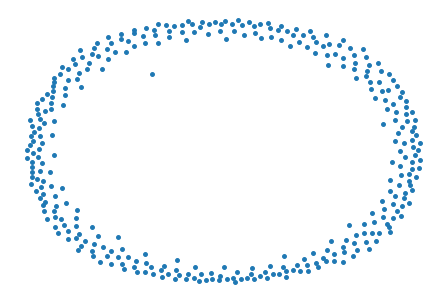

In [38]:
nx.draw(G, node_size=15)

In [39]:
for e in entities:
    if len(e) > 1:
        for i in range(len(e)-1):
           G.add_edges_from([(str(e[i]),str(e[i+1]))])

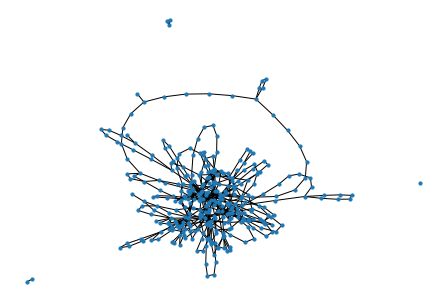

In [40]:
nx.draw(G, node_size=10)

## Let's use the shell version of the network graph

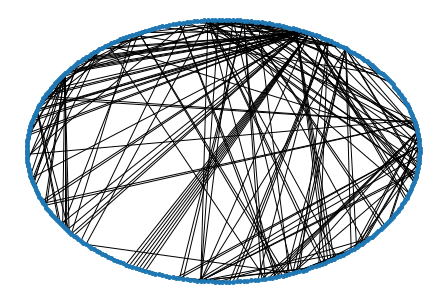

In [41]:
nx.draw_shell(G, node_size=15)

## Let’s find out which node or entity has the most number of connections.

We can tell that some nodes are heavier on connections than others. To see which nodes have the most connections, let’s use G.degree().

In [42]:
max(dict(G.degree()).items(), key = lambda x : x[1])

('Amsterdam', 26)

## To find out which other nodes have the most number of connections, let’s check the top 5

In [45]:
import operator
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=operator.itemgetter(1), reverse=True)

In [46]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Amsterdam', 26)
('St', 23)
('Hamburg', 21)
('Rotterdam', 21)
('France', 16)


https://towardsdatascience.com/populating-a-network-graph-with-named-entities-fb8e3d2a380f